# ACTK dataprovider

In [2]:
from pathlib import Path
import json

import numpy as np
import pandas as pd
import torch

import PIL
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 

from aicsimageio import AICSImage

from integrated_cell.utils.plots import tensor2im, imshow
from integrated_cell.data_providers.RefDataProviderACTKSeg import DataProvider as RefDataProviderACTKSeg
from integrated_cell.data_providers.RefDataProviderSeg import DataProvider as RefDataProviderSeg
from integrated_cell.data_providers.TargetDataProviderACTKSeg import DataProvider as TargDataProviderACTKSeg

In [3]:
dpACTK = TargDataProviderACTKSeg(
    image_parent="/allen/aics/modeling/jacksonb/results/actk/2020-09-03/singlecellimages/",
    batch_size=8,
    check_files=False,
    verbose=True,
    crop_to=[160, 96, 64]
)

reading csv manifest


/allen/aics/apps/hpc_shared/mod/anaconda3-5.3.0/envs/rory_pytorch_integrated_cell/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: DtypeWarning: Columns (9,36,43,46,65,66) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
sample = dpACTK.get_sample(train_or_test='train', inds=[i for i in range(8)])

In [5]:
sample[0].shape

torch.Size([8, 1, 160, 96, 64])

In [6]:
sample[1]

tensor([1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
sample[2].shape

torch.Size([8, 2, 160, 96, 64])

In [8]:
dpACTK.get_n_classes()

25

In [9]:
dp = RefDataProviderSeg(
    image_parent="../../data/",
    csv_name="metadata.csv",
    batch_size=8,
    check_files=False,
    channelInds=[3, 1, 4],
    crop_to=[160, 96, 64]
)

reading csv manifest


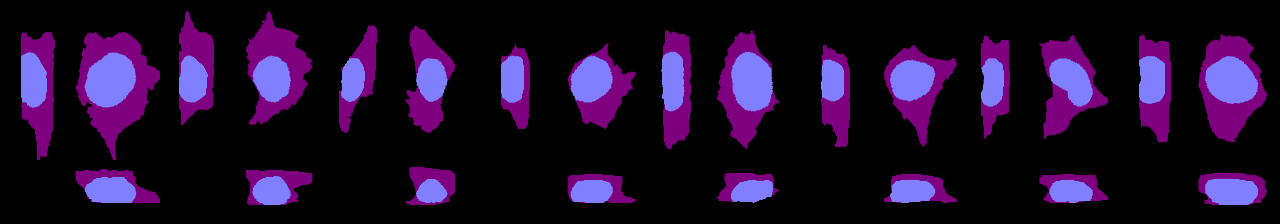

In [10]:
# channel 0 = membrane, channel 1 = nuc
x = dp.get_sample(train_or_test='train', inds=[i for i in range(8)])
im = tensor2im(x)
Image.fromarray(np.uint8(im*255))

In [11]:
x.shape

torch.Size([8, 2, 160, 96, 64])

In [16]:
dp.data

{'test': {'inds': array([   14,    32,    33, ..., 49317, 49318, 49319])},
 'validate': {'inds': array([    2,    12,    39, ..., 49192, 49193, 49194])},
 'train': {'inds': array([    0,     1,     3, ..., 49322, 49323, 49324])}}